# Plot Fig 4 or Fig Sup 2

## Hide or show code

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off the raw code."></form>''')

## Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.gridspec as gs
import matplotlib.patches as mpatches
import seaborn as sb
import pandas as pd
from pyabc import History

## Define parameters

In [3]:
# Define whether to plot Fig 4 or Fig Sup 2
figure_to_plot = 'figsup2'#fig4, figsup2

In [4]:
# True parameters in simulations
I = 1E-5 * np.array(([-4.8, 2.7, -5.], [-2.9, -6.3, 3.3], [2., -4.1, -5.4]))
gR = np.array([0.9, 1.7, 1.3])
n0 = np.array([700, 7000, 12000])
true_parameters = np.hstack((I.reshape(1,9)[0],gR,n0.sum()))

## Read data

In [5]:
# Set noise, number of time points and number of replicates
noise_ = [0.05,0.1,0.2]
t_points_ = [3,6,9]
n_timeseries_ = [3,6,9,12]

# Create data frame to store aggregated data
samples_abs_abund = pd.DataFrame(columns=['distance','t_points','n_timeseries','noise'])
samples_rel_abund = pd.DataFrame(columns=['distance','t_points','n_timeseries','noise'])

# Read each of the inference files
for noise in noise_:
    
    for t_points in t_points_:
        
        for n_timeseries in n_timeseries_:
            
            # Read file with a specific amount of noise, time points and replicates
            db_path_abs_abund = "sqlite:///../data/inference_abs_abund_t%i_r%i_n%.2f.db"%(t_points,n_timeseries,noise)
            db_path_rel_abund = "sqlite:///../data/inference_rel_abund_t%i_r%i_n%.2f.db"%(t_points,n_timeseries,noise)

            abc_abs_abund = History(db_path_abs_abund)
            abc_rel_abund = History(db_path_rel_abund)
            
            # Extract the posteriors
            posterior_samples_abs_abund = abc_abs_abund.get_distribution()[0]
            posterior_samples_rel_abund = abc_rel_abund.get_distribution()[0]

            # Select the specific metric to plot for Fig 4 or Fig Sup 2
            if figure_to_plot == 'fig4':
                distance_abs_abund = posterior_samples_abs_abund['I_2_1']#-(-4.1E-5)
                distance_rel_abund = posterior_samples_rel_abund['I_2_1']#-(-4.1E-5)
            
            elif figure_to_plot == 'figsup2':
                distance_abs_abund = (((true_parameters-posterior_samples_abs_abund)/true_parameters)**2).sum(1)
                distance_rel_abund = (((true_parameters-posterior_samples_rel_abund)/true_parameters)**2).sum(1)
    
            # Append the selected metric (500 samples) to the aggregated dataset
            samples_abs_abund = samples_abs_abund.append(
                pd.DataFrame(
                    np.vstack((distance_abs_abund.to_numpy(),500*[t_points],500*[n_timeseries],500*[noise])).T,
                    columns=['distance','t_points','n_timeseries','noise']
                )
            )
            samples_rel_abund = samples_rel_abund.append(
                pd.DataFrame(
                    np.vstack((distance_rel_abund.to_numpy(),500*[t_points],500*[n_timeseries],500*[noise])).T,
                    columns=['distance','t_points','n_timeseries','noise']
                )
            )

# Change data types for convenience
samples_abs_abund['t_points'] = samples_abs_abund['t_points'].astype(int)
samples_abs_abund['n_timeseries'] = samples_abs_abund['n_timeseries'].astype(int)

samples_rel_abund['t_points'] = samples_rel_abund['t_points'].astype(int)
samples_rel_abund['n_timeseries'] = samples_rel_abund['n_timeseries'].astype(int)

# Print aggregated data set for control
samples_rel_abund

<ipython-input-5-de52ff8fa51f>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_abs_abund = samples_abs_abund.append(
<ipython-input-5-de52ff8fa51f>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_rel_abund = samples_rel_abund.append(
<ipython-input-5-de52ff8fa51f>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_abs_abund = samples_abs_abund.append(
<ipython-input-5-de52ff8fa51f>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_rel_abund = samples_rel_abund.append(
<ipython-input-5-de52ff8fa51f>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

<ipython-input-5-de52ff8fa51f>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_abs_abund = samples_abs_abund.append(
<ipython-input-5-de52ff8fa51f>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_rel_abund = samples_rel_abund.append(
<ipython-input-5-de52ff8fa51f>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_abs_abund = samples_abs_abund.append(
<ipython-input-5-de52ff8fa51f>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples_rel_abund = samples_rel_abund.append(
<ipython-input-5-de52ff8fa51f>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

,distance,t_points,n_timeseries,noise
0,2.431544,3,3,0.05
1,3.544721,3,3,0.05
2,6.047099,3,3,0.05
3,8.411820,3,3,0.05
4,15.312378,3,3,0.05
...,...,...,...,...
495,11.517814,9,12,0.20
496,2.591199,9,12,0.20
497,2.599691,9,12,0.20
498,6.128404,9,12,0.20


## Plot and save figure

<ipython-input-6-2c3254b2cd28>:82: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  mp.tight_layout()


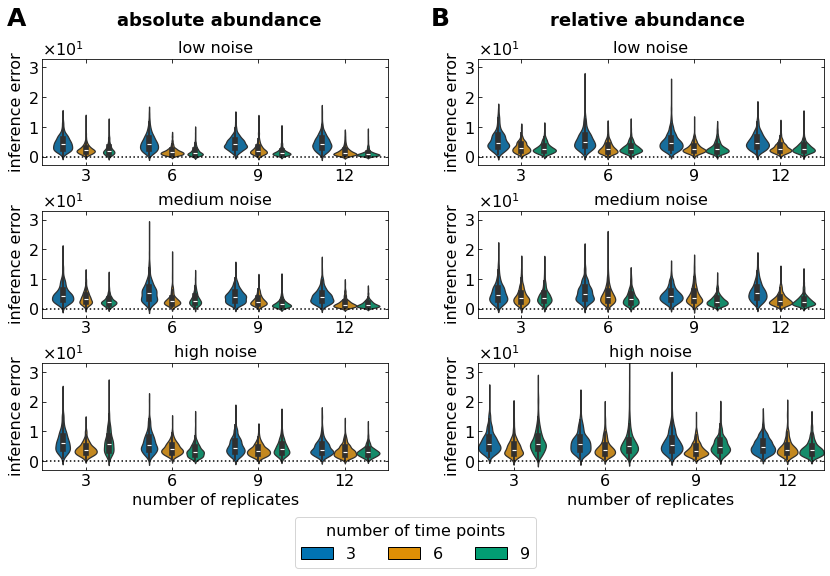

In [6]:
# Make figure (Fig 4 or Fig Sup 2)
fig = mp.figure(figsize=(14, 9))

# Create array to build figure panels
gs0 = gs.GridSpec(19, 45, figure=fig)

# Create left panels (Fig 4A or Fig Sup 2A)
gsA = gs0[2:-1,:20].subgridspec(38, 1)

axA0 = fig.add_subplot(gsA[:10, :])
axA1 = fig.add_subplot(gsA[14:24, :])
axA2 = fig.add_subplot(gsA[28:, :])

# Create right panels (Fig 4B or Fig Sup 2B)
gsB = gs0[2:-1,25:].subgridspec(38, 1)

axB0 = fig.add_subplot(gsB[:10, :])
axB1 = fig.add_subplot(gsB[14:24, :])
axB2 = fig.add_subplot(gsB[28:, :])

# Plot violin plots for noise 0.05, 0.1 and 0.2 (Fig 4A or Fig Sup 2A)
sb.violinplot(data=samples_abs_abund[samples_abs_abund['noise']==0.05], x='n_timeseries', y='distance', hue='t_points', palette='colorblind', ax=axA0) 
sb.violinplot(data=samples_abs_abund[samples_abs_abund['noise']==0.1], x='n_timeseries', y='distance', hue='t_points', palette='colorblind', ax=axA1) 
sb.violinplot(data=samples_abs_abund[samples_abs_abund['noise']==0.2], x='n_timeseries', y='distance', hue='t_points', palette='colorblind', ax=axA2) 

# Plot violin plots for noise 0.05, 0.1 and 0.2 (Fig 4B or Fig Sup 2B)
sb.violinplot(data=samples_rel_abund[samples_rel_abund['noise']==0.05], x='n_timeseries', y='distance', hue='t_points', palette='colorblind', ax=axB0) 
sb.violinplot(data=samples_rel_abund[samples_rel_abund['noise']==0.1], x='n_timeseries', y='distance', hue='t_points', palette='colorblind', ax=axB1) 
sb.violinplot(data=samples_rel_abund[samples_rel_abund['noise']==0.2], x='n_timeseries', y='distance', hue='t_points', palette='colorblind', ax=axB2) 

# Plot
for ax in [axA0,axA1,axA2,axB0,axB1,axB2]:
    if figure_to_plot == 'fig4':
        ax.axhline(-4.1E-5,linestyle=':',color='k')
        ax.set_ylabel(r'inter-specific ($I_{3,2}$)',fontsize=15)
        ax.set_ylim(-1.4E-4,5E-5)
    if figure_to_plot == 'figsup2':
        ax.axhline(0,linestyle=':',color='k')
        ax.set_ylabel('inference error',fontsize=16)
        ax.set_ylim(-3,33)
    
    ax.tick_params(axis='both', direction='in',top=True, right=True)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.yaxis.offsetText.set_fontsize(16)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    ax.locator_params(axis='y', nbins=4)

# General setup of the figure panels
for ax in [axA0,axB0]:
    ax.set_title('low noise', fontsize=16)

for ax in [axA0,axB0,axA1,axA2,axB1,axB2]:#
    ax.get_legend().remove()

for ax in [axA0,axA1,axB0,axB1]:
    ax.set_xlabel('',fontsize=16)

for ax in [axA2,axB2]:
    ax.set_xlabel('number of replicates',fontsize=16)
    ax.set_title('high noise', fontsize=16)

for ax in [axA1,axB1]:
    ax.set_title('medium noise', fontsize=16)

# Make a shared legend of the # of time points for the figure
leg_colors = sb.color_palette(palette='colorblind', n_colors=3)
t3_patch = mpatches.Patch(facecolor = leg_colors[0], edgecolor = 'k', label='3')
t6_patch = mpatches.Patch(facecolor = leg_colors[1], edgecolor = 'k', label='6')
t9_patch = mpatches.Patch(facecolor = leg_colors[2], edgecolor = 'k', label='9')
fig.legend(handles=[t3_patch,t6_patch,t9_patch], title='number of time points', title_fontsize=16, loc='lower center', ncol=3, prop=dict(size=16))

# Annotate panels
mp.gcf().text(0.09, 0.85, "A", weight='bold', fontsize=25)
mp.gcf().text(0.51, 0.85, "B", weight='bold', fontsize=25)

# Annotate panels
mp.gcf().text(0.30, 0.85, "absolute abundance", weight='bold', fontsize=18, horizontalalignment='center')
mp.gcf().text(0.725, 0.85, "relative abundance", weight='bold', fontsize=18, horizontalalignment='center')

# Save figure
mp.tight_layout()
mp.margins(x=0)
if figure_to_plot == 'fig4':
    mp.savefig('fig4.pdf',dpi=300,bbox_inches='tight')
elif figure_to_plot == 'figsup2':
    mp.savefig('figsup2.pdf',dpi=300,bbox_inches='tight')